In [258]:
import numpy as np
import torch
import matplotlib.pylab as pl
import ot
import numpy as np
import matplotlib.pylab as pl
import ot
import ot.plot
from ot.datasets import make_1D_gauss as gauss
from MIOFlow.losses import density_specified_OT_loss

In [259]:
n1 = 20  # nb samples
n2 = 20  # nb samples
n12 = 20  # nb samples

mu_s = np.array([-1, -1])
cov_s = np.array([[1, 0], [0, 1]])

mu_t = np.array([-1, -1])
cov_t = np.array([[1, 0], [0, 1]])

mu_t2 = np.array([-4, 4])
cov_t2 = np.array([[1, 0], [0, 1]])

mu_s2 = np.array([4, 4])
cov_s2 = np.array([[1, 0], [0, 1]])

np.random.seed(0)
xs = ot.datasets.make_2D_samples_gauss(n1, mu_s, cov_s)
xt = ot.datasets.make_2D_samples_gauss(n2, mu_t, cov_t)
xt2 = ot.datasets.make_2D_samples_gauss(n12, mu_t2, cov_t2)
xs2 = ot.datasets.make_2D_samples_gauss(n12, mu_s2, cov_s2)

# xs = np.concatenate((xs, xs2), axis=0)
xt = np.concatenate((xt, xt2), axis=0)

n_noise = 0

xs = np.concatenate((xs, ((np.random.rand(n_noise, 2) - 4))), axis=0)
xt = np.concatenate((xt, ((np.random.rand(n_noise, 2) + 6))), axis=0)

xs = torch.tensor(xs, dtype=torch.float32, requires_grad=True)
xt = torch.tensor(xt, dtype=torch.float32, requires_grad=False)

# n1 = n1 + n12 + n_noise
n1 = n1 + n_noise
n2 = n2 + n12 + n_noise

a, b = np.ones((n1,)), np.ones((n2,))  # uniform distribution on samples

a = torch.tensor(a, dtype=torch.float32, requires_grad=True)
b = torch.tensor(b, dtype=torch.float32, requires_grad=True)

# loss matrix
# M = ot.dist(xs, xt)
M = torch.cdist(xs, xt)
# M /= M.max()



In [260]:
M2 = ot.dist(xs, xt)

In [261]:
torch.isclose(M,M2).all()

tensor(False)

In [262]:
reg = 0.005
reg_m_kl = 0.05
reg_m_l2 = [5, 5]
mass = 0.7

# loss = ot.unbalanced.mm_unbalanced2(a, b, M, reg_m_kl, div='kl')
# loss = ot.emd2(a, b, M)
# loss = ot.sinkhorn2(a, b, M, 0.5, verbose=False)
# loss_func = density_specified_OT_loss(reg=0.5, take_softmax=True)
# loss = loss_func(xs, xt, a)
# Gs = ot.sinkhorn(a, b, M, 0.5, verbose=False)
# loss = ot.unbalanced.sinkhorn_unbalanced2(a, b, M, reg, reg_m_kl)
# Gs = ot.unbalanced.sinkhorn_knopp_unbalanced(a, b, M.detach(), reg, reg_m_kl)
# Gs = ot.partial.partial_wasserstein(a, b, M, m=mass)
# Gs = ot.unbalanced.mm_unbalanced(a, b, M, reg_m_kl, div='kl')
Gs = ot.unbalanced.mm_unbalanced(a, b, M, reg_m_l2, div='l2')
loss = (Gs * M).sum()
loss.backward()
# emd_ot = ot.emd(a, b, M)
# entropic_kl_uot = ot.unbalanced.sinkhorn_unbalanced(a, b, M, reg, reg_m_kl)
# kl_uot = ot.unbalanced.mm_unbalanced(a, b, M, reg_m_kl, div='kl')
# l2_uot = ot.unbalanced.mm_unbalanced(a, b, M, reg_m_l2, div='l2')

In [263]:
print(a.requires_grad, b.requires_grad)
print(loss.requires_grad)


True True
True


In [264]:
loss = (a.sum() + b.sum()) * 0.1
loss.backward()
print(a.grad, b.grad)

tensor([ 2.1603,  3.7260,  1.8008,  1.0261,  0.4726,  1.0882,  1.1129,  0.8601,
         1.5441,  0.3622,  0.1323,  0.7595,  2.1811,  0.1532,  4.6218,  0.5953,
        -0.5639,  0.1735,  2.0216, -0.2865]) tensor([ 1.3438,  1.0300,  0.6588,  0.7023,  1.3440,  0.5206,  0.7231, -0.2057,
        -0.2777,  0.7411,  0.7771,  1.0293, -0.0133,  1.0095,  0.5972, -0.8899,
        -0.8294, -0.0981,  1.0458,  0.1455,  0.1000,  2.4669,  1.7531,  0.2864,
         0.1000,  0.1000,  1.6959,  1.4865,  0.1000,  1.4793, -0.9837,  0.1000,
         0.1000,  3.7685,  1.1854,  0.7035,  0.1000,  0.1001,  0.4837,  1.4611])


In [265]:
# loss_emd = (emd_ot * M).sum()
# loss_ent_kl = (entropic_kl_uot * M).sum()
# loss_kl_uot = (kl_uot * M).sum()
# loss_l2_uot = (l2_uot * M).sum()

In [266]:
# loss_emd.backward()
# loss_ent_kl.backward()
# loss_kl_uot.backward()

In [267]:
loss

tensor(6., grad_fn=<MulBackward0>)

In [268]:
a.grad

tensor([ 2.1603,  3.7260,  1.8008,  1.0261,  0.4726,  1.0882,  1.1129,  0.8601,
         1.5441,  0.3622,  0.1323,  0.7595,  2.1811,  0.1532,  4.6218,  0.5953,
        -0.5639,  0.1735,  2.0216, -0.2865])

In [269]:
b.grad

tensor([ 1.3438,  1.0300,  0.6588,  0.7023,  1.3440,  0.5206,  0.7231, -0.2057,
        -0.2777,  0.7411,  0.7771,  1.0293, -0.0133,  1.0095,  0.5972, -0.8899,
        -0.8294, -0.0981,  1.0458,  0.1455,  0.1000,  2.4669,  1.7531,  0.2864,
         0.1000,  0.1000,  1.6959,  1.4865,  0.1000,  1.4793, -0.9837,  0.1000,
         0.1000,  3.7685,  1.1854,  0.7035,  0.1000,  0.1001,  0.4837,  1.4611])

In [270]:
xs.grad

tensor([[ 0.2753,  0.1262],
        [ 0.2929, -0.0272],
        [ 0.3504,  0.1572],
        [ 0.6720,  0.2023],
        [ 0.3026,  0.1032],
        [ 0.6882, -0.4077],
        [ 0.6741, -0.0513],
        [ 0.8050,  0.1661],
        [ 0.4739,  0.1270],
        [ 0.8916,  0.4355],
        [-1.5109,  1.4796],
        [ 0.7905, -0.0982],
        [ 0.2182, -0.1348],
        [ 0.9656,  0.4083],
        [-0.0733,  0.1568],
        [ 0.8262,  0.0484],
        [ 0.0511, -1.2762],
        [-0.0769,  0.7956],
        [ 0.4162,  0.6014],
        [ 1.1858,  0.3113]])

In [271]:
grads0 = a.grad.detach().numpy()

In [272]:
grads0

array([ 2.1603203 ,  3.7260084 ,  1.800792  ,  1.0260926 ,  0.47257093,
        1.0881646 ,  1.1129147 ,  0.8600501 ,  1.5441328 ,  0.36219338,
        0.1323212 ,  0.7595343 ,  2.1810572 ,  0.15317518,  4.6217537 ,
        0.59525186, -0.56393933,  0.17350449,  2.0215523 , -0.28648347],
      dtype=float32)

In [273]:
xs.grad

tensor([[ 0.2753,  0.1262],
        [ 0.2929, -0.0272],
        [ 0.3504,  0.1572],
        [ 0.6720,  0.2023],
        [ 0.3026,  0.1032],
        [ 0.6882, -0.4077],
        [ 0.6741, -0.0513],
        [ 0.8050,  0.1661],
        [ 0.4739,  0.1270],
        [ 0.8916,  0.4355],
        [-1.5109,  1.4796],
        [ 0.7905, -0.0982],
        [ 0.2182, -0.1348],
        [ 0.9656,  0.4083],
        [-0.0733,  0.1568],
        [ 0.8262,  0.0484],
        [ 0.0511, -1.2762],
        [-0.0769,  0.7956],
        [ 0.4162,  0.6014],
        [ 1.1858,  0.3113]])

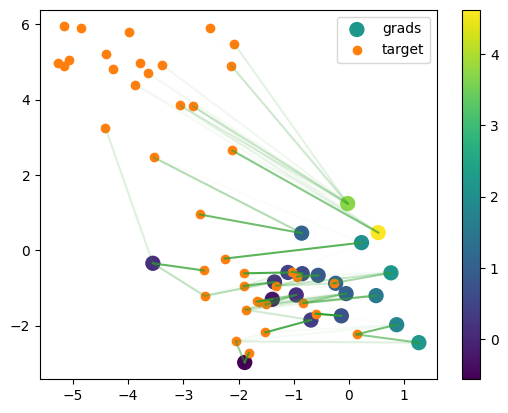

([], [])

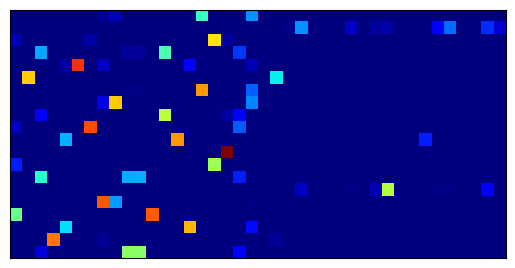

In [274]:
grads = grads0
xs = xs.detach()
xt = xt.detach()
P = Gs.detach().numpy()
if P.sum() > 0:
    P = P / P.max()
for i in range(n1):
    for j in range(n2):
        if P[i, j] > 0:
            pl.plot([xs[i, 0], xt[j, 0]], [xs[i, 1], xt[j, 1]], color='C2',
                    alpha=P[i, j])
# pl.scatter(xs[:, 0], xs[:, 1], c='C0', alpha=1, label='source')
scatter = pl.scatter(xs[:, 0], xs[:, 1], c=grads, alpha=1, s=100, label='grads')
pl.scatter(xt[:, 0], xt[:, 1], c='C1', alpha=1, label='target')
pl.legend()
pl.colorbar(scatter)
pl.show()
# pl.scatter(xs[:, 0], xs[:, 1], c='C0', s=P.sum(1).ravel() * (1 + p) * 2)
# pl.scatter(xt[:, 0], xt[:, 1], c='C1', s=P.sum(0).ravel() * (1 + p) * 2)
pl.yticks(())
pl.xticks(())
pl.imshow(P, cmap='jet')
pl.yticks(())
pl.xticks(())

In [275]:
P.shape
# show all zero cols and rows of P respectively
zero_cols = np.isclose(P.sum(0), 0)
zero_rows = np.isclose(P.sum(1), 0)

# find the indices of zero cols and rows
zero_cols_indices = np.where(zero_cols)[0]
zero_rows_indices = np.where(zero_rows)[0]
print(zero_cols_indices)
print(zero_rows_indices)


[20 24 25 28 31 32 36 37]
[]


In [276]:
grads

array([ 2.1603203 ,  3.7260084 ,  1.800792  ,  1.0260926 ,  0.47257093,
        1.0881646 ,  1.1129147 ,  0.8600501 ,  1.5441328 ,  0.36219338,
        0.1323212 ,  0.7595343 ,  2.1810572 ,  0.15317518,  4.6217537 ,
        0.59525186, -0.56393933,  0.17350449,  2.0215523 , -0.28648347],
      dtype=float32)

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

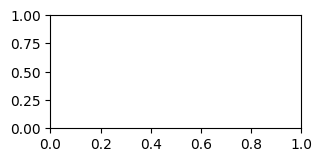

In [277]:

pl.figure(3, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, Gs, 'UOT matrix Sinkhorn')

pl.show()

In [ ]:
pl.figure(4, figsize=(6.4, 3))
pl.plot(x, a, 'b', label='Source distribution')
pl.plot(x, b, 'r', label='Target distribution')
pl.fill(x, Gs.sum(1), 'b', alpha=0.5, label='Transported source')
pl.fill(x, Gs.sum(0), 'r', alpha=0.5, label='Transported target')
pl.legend(loc='upper right')
pl.title('Distributions and transported mass for UOT')

NameError: name 'x' is not defined

<Figure size 640x300 with 0 Axes>